# JDH statistics

## Articles published

By using the JDH api track: https://journalofdigitalhistory.org/api/articles/

S


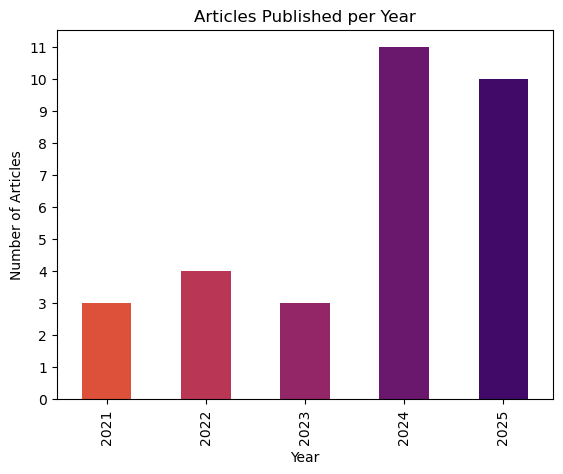

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np



# API URL
api_url = "https://journalofdigitalhistory.org/api/articles/?format=json&limit=100"

# Make the API call
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:
        # Create a DataFrame with selected columns
        df = pd.DataFrame(results, columns=['status', 'publication_date', 'repository_type','tags'])

        # Extract the year using regular expressions
        df['publication_year'] = df['publication_date'].str.extract(r'(\d{4})', expand=False)
        
        # Check if 'tags' column exists before applying the filter
        if 'tags' in df.columns:
            # Filter out editorial articles
            df = df[~df['tags'].apply(lambda x: any(tag['name'] == 'editorial' for tag in x))]

        # Count the number of articles per year
        articles_per_year = df['publication_year'].value_counts().sort_index()

        # Plot the data
        colors = cm.inferno_r(np.linspace(.4, .8, 5))
        articles_per_year.plot(kind='bar', xlabel='Year', ylabel='Number of Articles', title='Articles Published per Year', color=colors)
        # Set y-axis ticks to integers only
        plt.yticks(range(int(articles_per_year.max()) + 1))

        plt.show()

    else:
        print("No articles found in the response.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


## Abstract submitted

## Per year

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from getenv import *

credentials = getCredentials()

# API URL
api_url = "https://journalofdigitalhistory.org/api/abstracts/?format=json&limit=100"


username = credentials[0]
password = credentials[1]

# Set up authentication
auth = (username, password)

# Make the API call with authentication
response = requests.get(api_url, auth=auth)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:
        # Create a DataFrame with selected columns
        df = pd.DataFrame(results, columns=['status', 'callpaper', 'submitted_date'])

        # Extract the year using regular expressions
        df['submitted_date'] = df['submitted_date'].str.extract(r'(\d{4})', expand=False)
        
 
        # Count the number of abstracts per year
        abstracts_per_year = df['submitted_date'].value_counts().sort_index()

     # Plot the data as a line plot
        colors = cm.inferno_r(np.linspace(.4, .8, 4))
        abstracts_per_year.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Abstracts', title='Abstracts submitted per Year', color=colors)

        plt.show()

    else:
        print("No abstracts found in the response.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


## Per Cfp

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from getenv import *

credentials = getCredentials()

# API URL
api_url = "https://journalofdigitalhistory.org/api/abstracts/?format=json&limit=100"


# Set up authentication
auth = (credentials[0], credentials[1])

# Make the API call with authentication
response = requests.get(api_url, auth=auth)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:
        # Create a DataFrame with selected columns
        df = pd.DataFrame(results, columns=['status', 'callpaper', 'submitted_date'])

        # Extract the year using regular expressions
        df['submitted_date'] = df['submitted_date'].str.extract(r'(\d{4})', expand=False)

        # Handle the case where callpaper is null by replacing it with "open_issue"
        df['callpaper'] = df['callpaper'].astype('object').fillna('open_issue')

 


In [ ]:
pivot_table = pd.pivot_table(df, values='status', index='submitted_date', columns='callpaper', aggfunc='count', fill_value=0)

# Plot the data as a line plot
colors = cm.inferno_r(np.linspace(.4, .8, 4))
ax = pivot_table.plot(kind='line', marker='o', xlabel='Year', ylabel='Number of Abstracts', title='Abstracts submitted per Year by Callpaper Type', color=colors)

# Get the handles and labels of the current axes
handles, labels = ax.get_legend_handles_labels()
# Map callpaper values to corresponding labels
callpaper_labels = {
            '5.0': 'AI & History',
            '4.0': 'Teaching Digital History',
            '3.0': 'DH China',
            '2.0': 'History through the web',
            '1.0': 'Digital Tools',
            'open_issue': 'Open Issue'  # You can customize this label
        }
# Update legend labels
labels = [callpaper_labels[label] for label in labels]

# Plot the legend
ax.legend(handles, labels, title='Callpaper Type', loc='upper left')

# Set the y-axis origin to 0
ax.set_ylim(bottom=0)

plt.show()

## Articles status

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from getenv import *

credentials = getCredentials()

# API URL
api_url = "https://journalofdigitalhistory.org/api/articles/?format=json&limit=100"


# Set up authentication
auth = (credentials[0], credentials[1])

# Make the API call with authentication
response = requests.get(api_url, auth=auth)



# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    response_data = response.json()

    # Extract the list of articles from the response
    results = response_data.get("results", [])

    if results:

        # Initialize an empty list to hold the processed articles
        processed_articles = []
    
        # Iterate through each article in the results
        for article in results:
            # Extract the title from the abstract, if available
            title = article.get('abstract', {}).get('title', 'No Title Available')
            issue_title = article.get('issue', {}).get('name', 'No Title Available')
            # Create a new dictionary with the status and the extracted title
            processed_article = {
                'status': article.get('status', 'No Status Available'),
                'title': title,
                'issue_title': issue_title
            }
            # Append the processed article to the list
            processed_articles.append(processed_article)
    
        # Create a DataFrame from the list of processed articles
        df = pd.DataFrame(processed_articles, columns=['status','issue_title','title'])



### Article status distribution

In [ ]:
# Count the occurrences of each status
status_counts = df['status'].value_counts()

# Plot a pie chart
colors = cm.inferno_r(np.linspace(.4, .8, 3))
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Article Status Distribution')
plt.show()

### Article status distribution per issue

In [ ]:
grouped_data = df.groupby(['issue_title', 'status']).size().unstack(fill_value=0)

# Plot a stacked bar chart
colors = cm.inferno_r(np.linspace(.4, .8, 4))
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)
plt.title('Number of Articles by Status and Issue')
plt.xlabel('Issue Title')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

## Technical review

Need to track the Github issue of the repository https://github.com/C2DH/jdh-notebook

11 open issued
On the 59 closed:

- 22 closed in 2024
- 27 closed in 2023
- 6 closed in 2022
- 4 closed in 2021




Let's retrive this information by API.

In [ ]:
from getenv import *

credentials = getCredentials()
ACCESS_TOKEN = credentials[2]

In [ ]:
import requests
import pandas as pd

# Assuming ACCESS_TOKEN is defined
headers = {
    'Authorization': f'token {ACCESS_TOKEN}',
}

params = {
    'state': 'closed',
    'per_page': 100,
}

repository_url = 'https://api.github.com/repos/C2DH/jdh-notebook/issues'
all_issues = []

while True:
    response = requests.get(repository_url, params=params, headers=headers)
    # Check if the request was successful
    if response.status_code == 200:
        issues = response.json()
        if not issues:
            break  # Break the loop if no more issues are returned
        all_issues.extend(issues)
        # GitHub API includes pagination links in the response headers
        if 'next' in response.links.keys():
            repository_url = response.links['next']['url']  # Get the URL for the next page
        else:
            break  # Break the loop if there are no more pages
    else:
        print(f"Failed to fetch issues. Status code: {response.status_code}")
        break

# Filter issues with the title containing 'Technical review'
filtered_issues = [issue for issue in all_issues if 'technical' in issue.get('title', '').lower()]

# Extract relevant information including the issue number and create a DataFrame
data = [{'number': issue['number'], 'title': issue['title'], 'status': issue['state']} for issue in filtered_issues]
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

In [ ]:

# Extract year from closed_at and create a DataFrame
data = [{'year': pd.to_datetime(issue['closed_at']).year} for issue in all_issues if issue['closed_at'] is not None]
df = pd.DataFrame(data)

# Count the number of issues closed per year
issues_per_year = df['year'].value_counts().sort_index()

# Plotting
colors = cm.inferno_r(np.linspace(.4, .8, 4))
issues_per_year.plot(kind='bar', color=colors)
plt.title('Number of Issues Closed per Year')
plt.xlabel('Year')
plt.ylabel('Number of Issues Closed')
plt.xticks(rotation=45)
plt.show()